# Lab 2

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

import scipy
import scipy.optimize

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
print(scipy.__version__)
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(sklearn.__version__)


1.5.4
3.3.4
1.1.5
1.19.5
0.11.2
0.24.2


## Dataset evaluation

In [3]:
train = pd.read_csv('train.csv')
train.head(10)


,index,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,0,495.67,17.0,1,22,0,1,0.00,0.0,185.18,287.05,0.85,6.33,54.38,0.0,0.0,0.00,30.54,0.00,509.94
1,1,595.67,21.0,1,32,0,1,0.00,0.0,76.28,522.28,0.00,7.96,190.97,0.0,0.0,0.00,0.00,0.00,606.52
2,2,786.37,10.0,1,45,1,2,0.00,0.0,131.27,566.15,0.00,20.23,328.13,0.0,0.0,8.85,0.00,0.00,726.50
3,3,1142.63,10.0,1,41,0,2,0.00,0.0,307.49,926.55,0.00,8.08,351.38,0.0,0.0,0.00,5.05,0.00,1247.17
4,4,567.47,19.0,1,36,0,1,0.00,0.0,4.18,529.77,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,533.95
5,5,1395.72,10.0,1,32,0,1,0.00,0.0,312.89,952.31,0.57,237.55,684.85,0.0,0.0,1.15,0.00,0.00,1504.48
6,6,342.52,23.0,1,23,0,2,85.67,0.0,7.65,79.42,0.00,0.00,87.08,0.0,0.0,0.00,0.00,0.00,87.08
7,7,639.85,11.0,1,45,0,1,538.17,0.0,192.23,494.98,0.00,10.64,492.78,0.0,0.0,0.00,1.76,0.12,699.85
8,8,628.84,12.0,1,20,0,2,1394.37,0.0,11.60,263.21,0.00,0.37,116.02,0.0,0.0,0.00,0.00,0.00,275.19
9,9,399.53,11.0,0,51,1,1,0.00,0.0,74.51,327.09,0.00,5.73,6.29,0.0,0.0,0.00,0.00,0.00,407.33


In [4]:
test = pd.read_csv('test.csv')
X_test = test.drop(columns=['index'])
test.head(3)


,index,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,0,14.0,1,30,1,1,0.00,0.0,209.29,358.34,0.0,1.49,33.67,0.0,0.0,0.00,1.6,0.0,570.72
1,1,14.0,0,26,0,1,154.91,0.0,19.08,146.38,0.0,0.00,96.97,0.0,0.0,0.00,0.0,0.0,165.45
2,2,10.0,1,32,0,1,0.00,0.0,121.21,428.18,0.0,17.90,62.89,0.0,0.0,18.12,0.0,0.0,585.42


Text(0.5, 1.0, 'Feature correlation matrix')

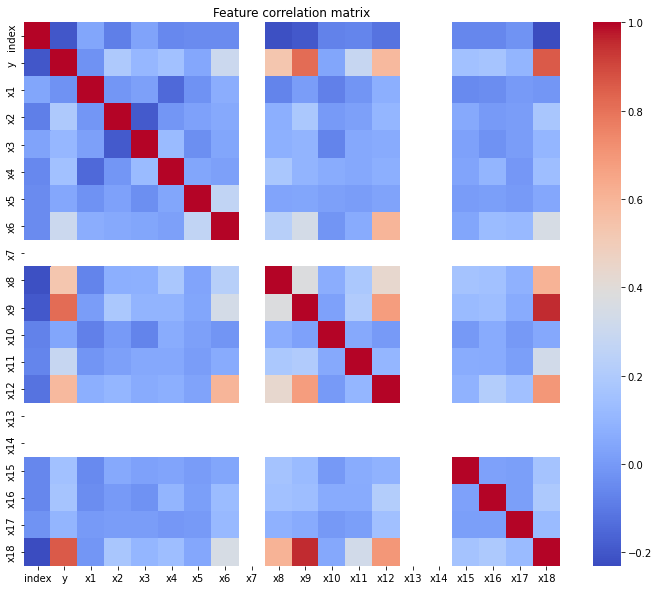

In [5]:
plt.figure(figsize=(12, 10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature correlation matrix")


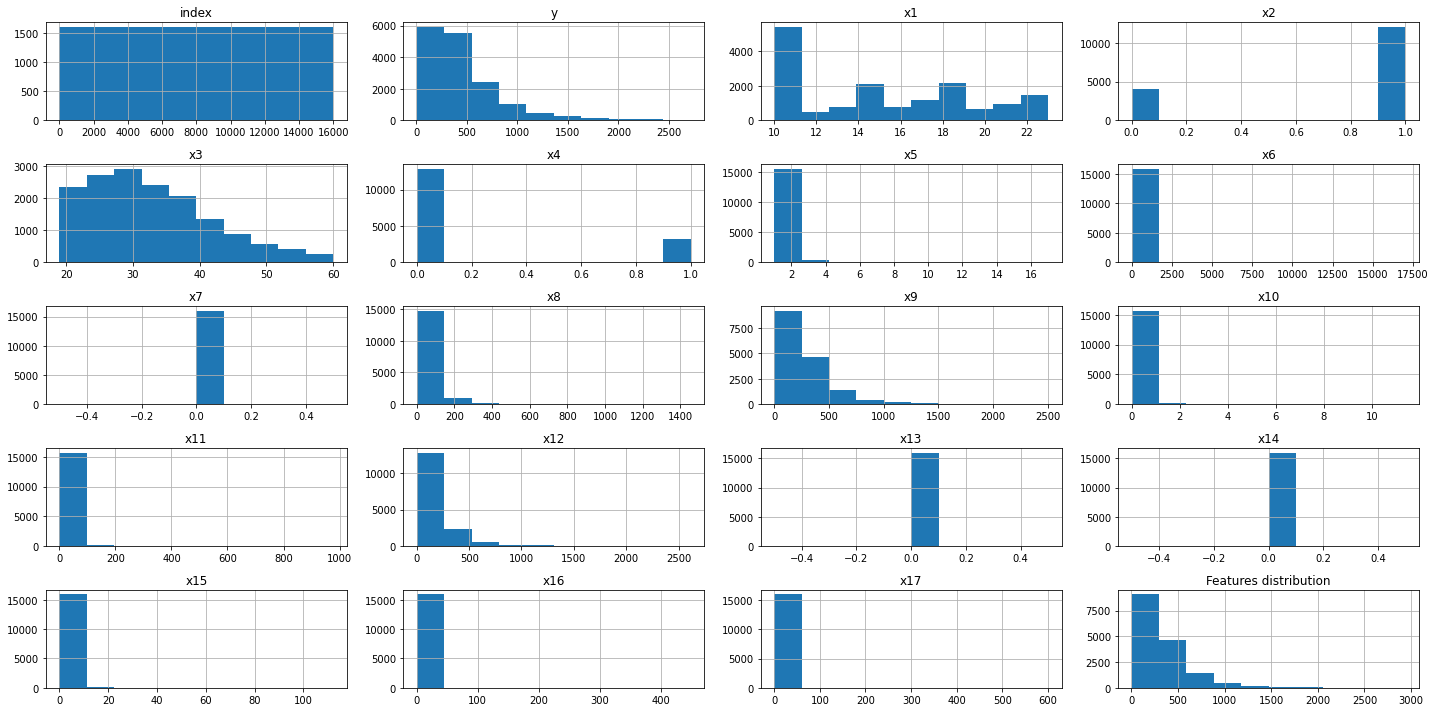

In [6]:
train.hist(figsize=(20, 10))
plt.title("Features distribution")
plt.tight_layout()


Drop highly correlated and zero features (based on graphs above)

In [7]:
train = train.drop(columns=['x7', 'x13', 'x14', 'x18'])
test = test.drop(columns=['x7', 'x13', 'x14', 'x18'])


In [8]:
# train_scaled = StandardScaler().fit_transform(train.values)
# train_df = pd.DataFrame(train_scaled, index=train.index, columns=train.columns)
# train = train_df

# test = scaler.fit_transform(test)


In [9]:
# train = train[train['x6'] >= 10]
# train = train[train['x6'] <= 2000]


In [10]:
X = train.drop(columns=['y'])
Y = train['y']

X_train, X_eval, Y_train, Y_eval = train_test_split(X, Y, test_size=0.2, random_state=42)


## Training
Linear regression was chosen as a basic model because of simplicity and relatively good results. Data seems to be of low quality, so operations on it may bring more significant accuracy benefits still keeping the model simple.

In [11]:
def evaluate_results(Y_eval, Y_predict):
    print(f"MAPE: {mean_absolute_percentage_error(Y_eval, Y_predict)}")


### Basic

In [12]:
model_0 = LinearRegression().fit(X_train, Y_train)

Y_eval_pred = model_0.predict(X_eval)
evaluate_results(Y_eval, Y_eval_pred)


MAPE: 0.3499747724737259


### Custom loss

In [13]:
def loss_1(coeffs, X, Y):
    Y_pred = np.dot(X, coeffs[1:]) + coeffs[0]
    return mean_absolute_percentage_error(Y, Y_pred)


In [14]:
coeffs = np.ones(X.shape[1] + 1)
res = scipy.optimize.minimize(loss_1, coeffs, args=(X_train, Y_train))
optimal_params = res.x


In [15]:
model_1 = LinearRegression()
model_1.coef_ = optimal_params[1:]
model_1.intercept_ = optimal_params[0]

Y_eval_pred = model_1.predict(X_eval.values)


In [16]:
evaluate_results(Y_eval, Y_eval_pred)


MAPE: 0.2414259124224958


No overfit => no regularization required

In [17]:
Y_train_pred = model_1.predict(X_train.values)
evaluate_results(Y_train, Y_train_pred)


MAPE: 0.24248232540522646


## Answer

In [18]:
model = model_1

answer = pd.DataFrame({'index': test.index, 'y': model.predict(test.values)}).set_index('index')
answer.head(3)


,y
index,
0,619.747582
1,179.525680
2,618.612787


In [19]:
answer.to_csv('answer.csv')
